In [1]:
import cx_Oracle
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Connect to the Oracle database
connection = cx_Oracle.connect('C##Xinru', '123456', 'localhost:1521/XE')
cursor = connection.cursor()

# Query to fetch the data
query = '''
    SELECT freq_A, freq_T, freq_GC
    FROM beeGenes
'''

# Execute the query and fetch all data
cursor.execute(query)
data = cursor.fetchall()

# Close cursor and connection
cursor.close()
connection.close()

# Convert the data to a NumPy array
data_array = np.array(data, dtype=np.float32)


C:\Users\17485\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


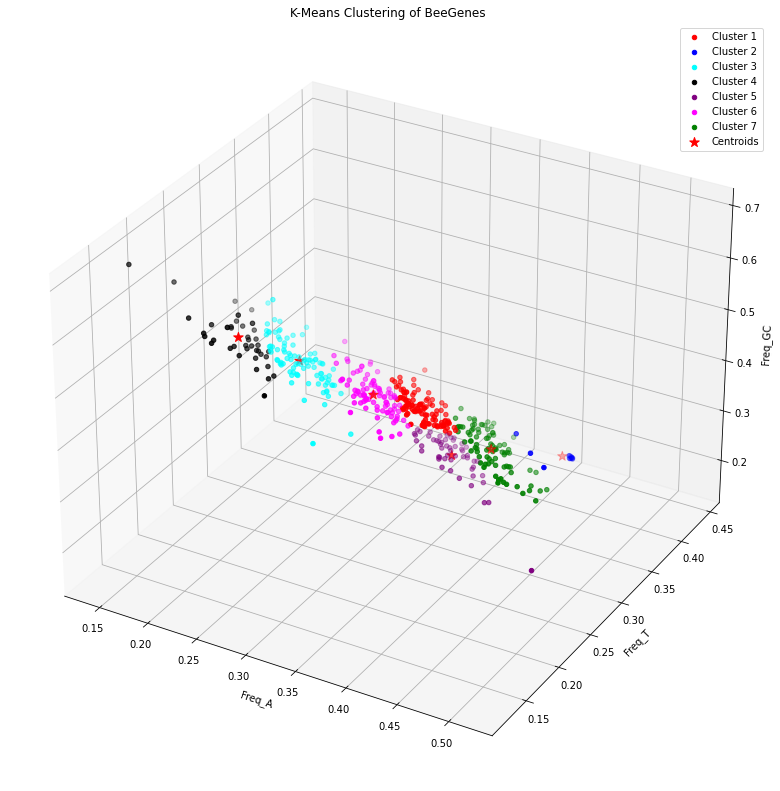

In [3]:
# K-Means settings
kmeans = KMeans(n_clusters=7, init='random', n_init=10, max_iter=500, tol=1e-4, random_state=0)
# Fit K-Means model
kmeans.fit(data_array)

# Plotting
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'aqua', 'black', 'purple', 'magenta', 'green']
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot for each cluster
for i in range(7):
    ax.scatter(data_array[clusters == i, 0], data_array[clusters == i, 1], data_array[clusters == i, 2], 
               c=colors[i], label=f'Cluster {i+1}', s=20, marker='o')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=100, marker='*', label='Centroids')

# Labels and titles
ax.set_xlabel('Freq_A')
ax.set_ylabel('Freq_T')
ax.set_zlabel('Freq_GC')
ax.set_title('K-Means Clustering of BeeGenes')

# Legend
ax.legend(loc='upper right')

plt.show()
